## Some things you should consider before scraping a website:

1) You should check a site's terms and conditions before you scrape them.

2) Space out your requests so you don't overload the site's server, doing this could get you blocked.

3) Scrapers break after time - web pages change their layout all the time, you'll more than likely have to rewrite your code.

4) Web pages are usually inconsistent, more than likely you'll have to clean up the data after scraping it.

5) Every web page and situation is different, you'll have to spend time configuring your scraper.

**There are three modules we'll need in addition to python are:**

1) BeautifulSoup, which you can download by typing: pip install beautifulsoup4 or conda install beautifulsoup4 (for the Anaconda distrbution of Python) in your command prompt.

2) lxml , which you can download by typing: pip install lxml or conda install lxml (for the Anaconda distrbution of Python) in your command prompt. Search Results. lxml is a Python library which allows for easy handling of XML and HTML files, and can also be used for web scraping. 

3) requests, which you can download by typing: pip install requests or conda install requests (for the Anaconda distrbution of Python) in your command prompt.

In [153]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
url = "https://www.multpl.com/united-states-population/table/by-year"

In [3]:
#Request content from webpage
result = requests.get(url)
c = result.content

#Set up BeautifulSoup object
soup = BeautifulSoup(c)

In [22]:
#Go to section of interest
summary = soup.find("div",{'class':'tcol'})

#Extract the Table
table = summary.find_all('table')


In [62]:
Raw_Data = []
Population = []
Year = []


rows = table[0].findAll('tr')

for tr in rows:
    
    cols = tr.findAll('td')
    
    for td in cols:
        
        text = td.find(text=True)
#         print(text)
        Raw_Data.append(text)
    
    count = 1
    
    for data in Raw_Data:
        
        if count % 2 != 0:
            
            Year.append(data)
            
        if count % 2 == 0:
            
            Population.append(data.replace("million\n\n",''))
            
        count +=1

In [87]:
Population=[float(i) for i in Population]

In [93]:
PSer = Series(Population); YSer = Series(Year)

In [116]:
Ptable = pd.concat([YSer,PSer],axis = 1)
Ptable.columns = ['Year','Population [millions]']

In [117]:
Ptable.head()

,Year,Population [millions]
0,"Mar 1, 2020",329.34
1,"Mar 1, 2020",329.34
2,"Jul 1, 2019",328.24
3,"Mar 1, 2020",329.34
4,"Jul 1, 2019",328.24


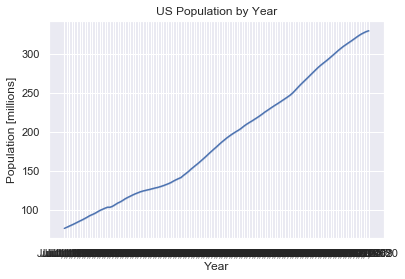

In [157]:
p = sns.lineplot(x = Ptable.iloc[:,0], y = Ptable.iloc[:,1])
p.set_title("US Population by Year");